<a href="https://colab.research.google.com/github/ahsanne/MyFirstProj/blob/master/MNISTT_Digit_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
#Reshaping data into 4 dims for keras (from (60000,28,28) to (60000,28,28,1))


img_rows = train_images[0].shape[0]
img_cols = train_images[1].shape[0]

train_images = train_images.reshape(train_images.shape[0],img_rows ,img_cols ,1)
test_images = test_images.reshape(test_images.shape[0],img_rows ,img_cols ,1)

# Input Shape Of A Single Picture
input_shape = (img_rows , img_cols, 1)

# Floating The Data :p
train_images = train_images.astype(float)
test_images = test_images.astype(float)

#Normaliing the data by changing it into a Binary Format
train_images /= 255  
test_images /= 255

print (test_images.shape)




(10000, 28, 28, 1)


In [0]:
#One Hot Encoding

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
#Network's Architecture
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras import backend as k
from keras.optimizers import SGD

# BASE MODEL

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))
#model.add(layers.Maxpooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(layers.Maxpooling2D(2,2))
#model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(layers.Maxpooling2D(2,2))
model.add(Dropout(0.5))

# CLASSIFIER
model.add(layers.Flatten())
model.add(layers.Dense(128, activation= "relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# COMPILER

model.compile(optimizer=SGD(0.01),
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
# TRAINING THE MODEL
history = model.fit(train_images,
          train_labels,
          batch_size =100,
          epochs = 10,
          verbose = 1,
          validation_data = (test_images,test_labels))
score = model.evaluate(test_images,test_labels, verbose = 0)
print('test loss:', score[0])
print('test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 127s 2ms/step - loss: 1.0260 - accuracy: 0.6640 - val_loss: 0.3193 - val_accuracy: 0.9093
Epoch 2/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.4682 - accuracy: 0.8537 - val_loss: 0.2427 - val_accuracy: 0.9306
Epoch 3/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.3896 - accuracy: 0.8811 - val_loss: 0.2031 - val_accuracy: 0.9422
Epoch 4/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.3360 - accuracy: 0.8964 - val_loss: 0.1811 - val_accuracy: 0.9469
Epoch 5/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.3032 - accuracy: 0.9086 - val_loss: 0.1584 - val_accuracy: 0.9543
Epoch 6/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.2733 - accuracy: 0.9179 - val_loss: 0.1398 - val_accuracy: 0.9591
Epoch 7/10
60000/60000 [==============================] - 127s

In [0]:
# With Batch_size = 32, epochs = 1 ....  train_loss,train_acc = (0.6253,0.8014) ===== test_loss,test_acc = 0.20,0.93 ====== val_loss,val_acc = 0.20,0.93
# with Batch_size = 100, epochs = 10.....  0.1865,0.944

In [0]:
import matplotlib.pyplot as plt
tr_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(tr_acc) + 1)
plt.plot(epochs, tr_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, tr_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.setp(line1, linewidth = 2.0 , marker = '+', markersize =10.0)
plt.setp(line1, linewidth = 2.0 , marker = '4', markersize =10.0)
plt.legend()
plt.show()


In [0]:
model.save('MNISTDatataset.h5')

TypeError: ignored

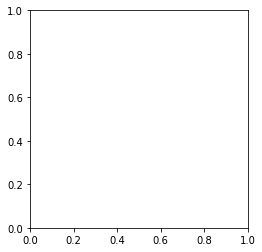

In [0]:
import matplotlib.pyplot as plt
import numpy as np
for i in range (0,3):
  j = 331
  #plt.subplot(j)
  rand = np.random.randint(0,len(train_images))
  plt.imshow(train_images[rand], cmap = plt.get_cmap('gray'))
  plt.show()
  j =+ 1
  plt.imshow 

